In [1]:
from importlib import reload
import matplotlib.pyplot as plt
from scipy import spatial
import numpy as np
from scipy.linalg import eig, eigh

import merger_tree_tools as mtt
import snapshot_tools as st
import halo_tools as ht
import galaxy_tools as gt
from time import sleep, perf_counter

from halomod import TracerHaloModel
import halomod
import hmf

In [2]:
mtt=reload(mtt)
st=reload(st)
ht=reload(ht)

In [3]:
snap=st.SnapshotTools('/fred/oz009/cpower/L125_N512_2LPT/HiSURFS_L125_0076/HiSURFS_L125_0076','HDF5', convention='SWIFT',positions_only=False)
halo1=ht.HaloTools('/fred/oz009/cpower/L125_N512_2LPT/halos/HiSURFS_L125_0076.VELOCIraptor','VELOCIraptor')
halo2=ht.HaloTools('/fred/oz009/cpower/L125_N512_2LPT/halos_2382023/HiSURFS_L125_0076.VELOCIraptor','VELOCIraptor')
halo3=ht.HaloTools('/fred/oz009/cpower/L125_N512_2LPT/halos_new/HiSURFS_L125_0076.VELOCIraptor','VELOCIraptor')
halo4=ht.HaloTools('/fred/oz009/cpower/L125_N512_2LPT/halos_old/HiSURFS_L125_0076.VELOCIraptor','VELOCIraptor')
tree=mtt.TreeTools('/fred/oz009/cpower/L125_N512_2LPT/trees/VELOCIraptor.walkabletree.forestID.hdf5.0','TreeFrog')

snap.ReadSnapshot()
halo1.ReadHaloCatalogue()
halo2.ReadHaloCatalogue()
halo3.ReadHaloCatalogue()
halo4.ReadHaloCatalogue()
tree.ReadMergerTreeCatalogue()

Reading data from /fred/oz009/cpower/L125_N512_2LPT/HiSURFS_L125_0076/HiSURFS_L125_0076.hdf5
Simulation scale factor: 1.000000
Number of particles: 0134217728
Number of particle types: 7
Reading data for 148501 groups
['File_id', 'Group_Size', 'Num_of_files', 'Num_of_groups', 'Number_of_substructures_in_halo', 'Offset', 'Offset_unbound', 'Parent_halo_ID', 'Total_num_of_groups']
Reading data for 148501 groups
Reading data for 49658411 particles in groups
Reading data for 4843005 particles in groups
Reading data for 124324 groups
['File_id', 'Group_Size', 'Num_of_files', 'Num_of_groups', 'Number_of_substructures_in_halo', 'Offset', 'Offset_unbound', 'Parent_halo_ID', 'Total_num_of_groups']
Reading data for 124324 groups
Reading data for 57781912 particles in groups
Reading data for 1754469 particles in groups
Reading data for 124500 groups
['File_id', 'Group_Size', 'Num_of_files', 'Num_of_groups', 'Number_of_substructures_in_halo', 'Offset', 'Offset_unbound', 'Parent_halo_ID', 'Total_num

In [9]:
final_snap_num=76
halo_list=np.logical_and(halo1.Structuretype==10,halo1.GroupMFOF>snap.Particle_mass*600)

main_subhalo_list=halo1.GroupID[halo_list]
print("Tracking merger histories for %04d halos"%main_subhalo_list.size)

NumGroups=main_subhalo_list.size
print(NumGroups)

halo1_m200=np.zeros(NumGroups)
veldisp1_sub=np.zeros(NumGroups)

G=43
ihalo=0
for main_halo in main_subhalo_list:
    halo_id=np.where(main_halo==halo1.GroupID)[0]
    # print(halo_id, main_halo, final_snap_num)
    redshift,mass,m200,group_number,subhalo_number,zform,alpha=tree.TrackMainHaloProgenitor(main_halo,final_snap_num)
    
    if len(mass)>0:
        # assemble history
        # formation_redshift[ihalo]=zform
        # alpha03[ihalo]=alpha

        # general properties
        # halo_masstot[ihalo]=mass[0]
        halo1_m200[ihalo]=m200[0]

        subhalo_ids = np.where(halo_id+1==halo1.ParentHaloID)#[0]
        for subhalo_id in subhalo_ids:
            if len(halo1.GroupM200[subhalo_id]) > 2:
                # m200_sub[ihalo] = np.max(halo.GroupM200[subhalo_id])
                # mvir_sub[ihalo] = np.max(halo.GroupMvir[subhalo_id])
                # mtot_sub[ihalo] = np.max(halo.GroupMass[subhalo_id])
                # mfof_sub[ihalo] = np.max(halo.GroupMFOF[subhalo_id])
                
                # Vmax_sub[ihalo] = np.max(halo.Vmax[subhalo_id])
                veldisp1_sub[ihalo] = np.linalg.norm(np.std(halo1.GroupVel[subhalo_id],axis=0))
                # vel_sub[ihalo] = np.std(halo.GroupVel[subhalo_id])
            else:
                # m200_sub[ihalo] = 0  
                # Vmax_sub[ihalo] = 0
                veldisp1_sub[ihalo] = 0

    ihalo+=1

print(halo1_m200,veldisp1_sub)

Tracking merger histories for 8682 halos
8682
[4.40996065e+04 4.24301593e+04 1.02335680e+04 ... 3.37217031e+01
 3.53003391e+01 3.18102098e+01] [1175.98364741 1161.98804245  944.86180759 ...    0.            0.
    0.        ]


In [10]:
final_snap_num=76
halo_list=np.logical_and(halo2.Structuretype==10,halo2.GroupMFOF>snap.Particle_mass*600)

main_subhalo_list=halo2.GroupID[halo_list]
print("Tracking merger histories for %04d halos"%main_subhalo_list.size)

NumGroups=main_subhalo_list.size
print(NumGroups)

halo2_m200=np.zeros(NumGroups)
veldisp2_sub=np.zeros(NumGroups)

G=43
ihalo=0
for main_halo in main_subhalo_list:
    halo_id=np.where(main_halo==halo2.GroupID)[0]
    # print(halo_id, main_halo, final_snap_num)
    redshift,mass,m200,group_number,subhalo_number,zform,alpha=tree.TrackMainHaloProgenitor(main_halo,final_snap_num)
    
    if len(mass)>0:
        # assemble history
        # formation_redshift[ihalo]=zform
        # alpha03[ihalo]=alpha

        # general properties
        # halo_masstot[ihalo]=mass[0]
        halo2_m200[ihalo]=m200[0]

        subhalo_ids = np.where(halo_id+1==halo2.ParentHaloID)#[0]
        for subhalo_id in subhalo_ids:
            if len(halo2.GroupM200[subhalo_id]) > 2:
                # m200_sub[ihalo] = np.max(halo.GroupM200[subhalo_id])
                # mvir_sub[ihalo] = np.max(halo.GroupMvir[subhalo_id])
                # mtot_sub[ihalo] = np.max(halo.GroupMass[subhalo_id])
                # mfof_sub[ihalo] = np.max(halo.GroupMFOF[subhalo_id])
                
                # Vmax_sub[ihalo] = np.max(halo.Vmax[subhalo_id])
                veldisp2_sub[ihalo] = np.linalg.norm(np.std(halo2.GroupVel[subhalo_id],axis=0))
                # vel_sub[ihalo] = np.std(halo.GroupVel[subhalo_id])
            else:
                # m200_sub[ihalo] = 0  
                # Vmax_sub[ihalo] = 0
                veldisp2_sub[ihalo] = 0

    ihalo+=1

print(halo2_m200,veldisp2_sub)

Tracking merger histories for 9155 halos
9155
[4.40996065e+04 4.24301593e+04 1.02335680e+04 ... 3.05100474e+01
 3.30968595e+01 3.20129504e+01] [1290.11524899 1242.60350912 1006.89051056 ...    0.            0.
    0.        ]


In [11]:
final_snap_num=76
halo_list=np.logical_and(halo3.Structuretype==10,halo3.GroupMFOF>snap.Particle_mass*600)

main_subhalo_list=halo3.GroupID[halo_list]
print("Tracking merger histories for %04d halos"%main_subhalo_list.size)

NumGroups=main_subhalo_list.size
print(NumGroups)

halo3_m200=np.zeros(NumGroups)
veldisp3_sub=np.zeros(NumGroups)

G=43
ihalo=0
for main_halo in main_subhalo_list:
    halo_id=np.where(main_halo==halo3.GroupID)[0]
    # print(halo_id, main_halo, final_snap_num)
    redshift,mass,m200,group_number,subhalo_number,zform,alpha=tree.TrackMainHaloProgenitor(main_halo,final_snap_num)
    
    if len(mass)>0:
        # assemble history
        # formation_redshift[ihalo]=zform
        # alpha03[ihalo]=alpha

        # general properties
        # halo_masstot[ihalo]=mass[0]
        halo3_m200[ihalo]=m200[0]

        subhalo_ids = np.where(halo_id+1==halo3.ParentHaloID)#[0]
        for subhalo_id in subhalo_ids:
            if len(halo3.GroupM200[subhalo_id]) > 2:
                # m200_sub[ihalo] = np.max(halo.GroupM200[subhalo_id])
                # mvir_sub[ihalo] = np.max(halo.GroupMvir[subhalo_id])
                # mtot_sub[ihalo] = np.max(halo.GroupMass[subhalo_id])
                # mfof_sub[ihalo] = np.max(halo.GroupMFOF[subhalo_id])
                
                # Vmax_sub[ihalo] = np.max(halo.Vmax[subhalo_id])
                veldisp3_sub[ihalo] = np.linalg.norm(np.std(halo3.GroupVel[subhalo_id],axis=0))
                # vel_sub[ihalo] = np.std(halo.GroupVel[subhalo_id])
            else:
                # m200_sub[ihalo] = 0  
                # Vmax_sub[ihalo] = 0
                veldisp3_sub[ihalo] = 0

    ihalo+=1

print(halo3_m200,veldisp3_sub)

Tracking merger histories for 9155 halos
9155
[4.40996065e+04 4.24301593e+04 1.02335680e+04 ... 3.05100474e+01
 3.30968595e+01 3.20129504e+01] [1293.69865368 1240.6654888  1007.02914187 ...    0.            0.
    0.        ]


In [12]:
final_snap_num=76
halo_list=np.logical_and(halo4.Structuretype==10,halo4.GroupMFOF>snap.Particle_mass*600)

main_subhalo_list=halo4.GroupID[halo_list]
print("Tracking merger histories for %04d halos"%main_subhalo_list.size)

NumGroups=main_subhalo_list.size
print(NumGroups)

halo4_m200=np.zeros(NumGroups)
veldisp4_sub=np.zeros(NumGroups)

G=43
ihalo=0
for main_halo in main_subhalo_list:
    halo_id=np.where(main_halo==halo4.GroupID)[0]
    # print(halo_id, main_halo, final_snap_num)
    redshift,mass,m200,group_number,subhalo_number,zform,alpha=tree.TrackMainHaloProgenitor(main_halo,final_snap_num)
    
    if len(mass)>0:
        # assemble history
        # formation_redshift[ihalo]=zform
        # alpha03[ihalo]=alpha

        # general properties
        # halo_masstot[ihalo]=mass[0]
        halo4_m200[ihalo]=m200[0]

        subhalo_ids = np.where(halo_id+1==halo4.ParentHaloID)#[0]
        for subhalo_id in subhalo_ids:
            if len(halo4.GroupM200[subhalo_id]) > 2:
                # m200_sub[ihalo] = np.max(halo.GroupM200[subhalo_id])
                # mvir_sub[ihalo] = np.max(halo.GroupMvir[subhalo_id])
                # mtot_sub[ihalo] = np.max(halo.GroupMass[subhalo_id])
                # mfof_sub[ihalo] = np.max(halo.GroupMFOF[subhalo_id])
                
                # Vmax_sub[ihalo] = np.max(halo.Vmax[subhalo_id])
                veldisp4_sub[ihalo] = np.linalg.norm(np.std(halo4.GroupVel[subhalo_id],axis=0))
                # vel_sub[ihalo] = np.std(halo.GroupVel[subhalo_id])
            else:
                # m200_sub[ihalo] = 0  
                # Vmax_sub[ihalo] = 0
                veldisp4_sub[ihalo] = 0

    ihalo+=1

print(halo4_m200,veldisp4_sub)

Tracking merger histories for 8099 halos
8099
[4.40996065e+04 4.24301593e+04 1.02335680e+04 ... 3.49020742e+01
 3.38021533e+01 2.72425567e+01] [1296.94836561 1448.18999388 1055.45134151 ...    0.            0.
    0.        ]


/tmp/ipykernel_757075/1509328912.py:5: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(halo1_m200)+10, np.log10(veldisp1_sub), s=2, color='r')
/tmp/ipykernel_757075/1509328912.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(halo2_m200)+10, np.log10(veldisp2_sub), s=2, color='b')
/tmp/ipykernel_757075/1509328912.py:7: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(halo3_m200)+10, np.log10(veldisp3_sub), s=2, color='g')
/tmp/ipykernel_757075/1509328912.py:8: RuntimeWarning: divide by zero encountered in log10
  ax.scatter(np.log10(halo4_m200)+10, np.log10(veldisp4_sub), s=2, color='pink')


Text(0, 0.5, '$Log_{10}~\\sigma$ [km s$^{-1}$]')

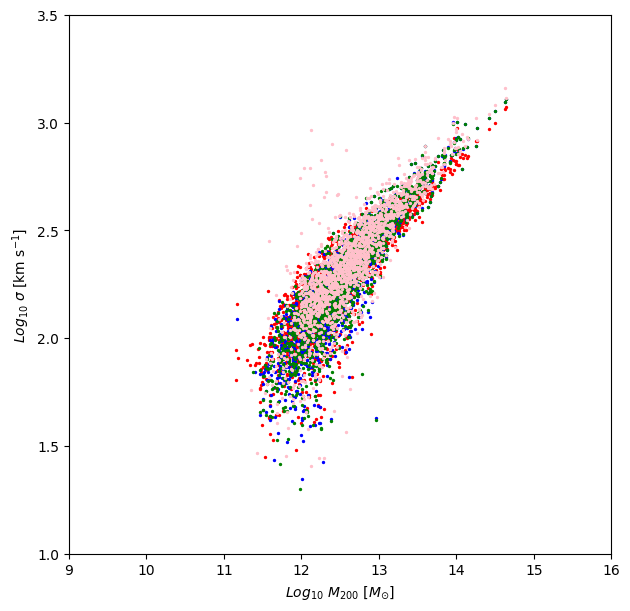

In [17]:
fig=plt.figure(figsize=(7,7))
ax=fig.add_subplot(1,1,1)
# for idx, (dataset, color, label) in enumerate(zip(datasets, colors, labels), start=1):
    # ax.scatter(np.log10(dataset[:, 1])+10, np.log10(dataset[:, 34]**2*dataset[:,5]/43/dataset[:, 1]), s=2, color=color)
ax.scatter(np.log10(halo1_m200)+10, np.log10(veldisp1_sub), s=2, color='r')
ax.scatter(np.log10(halo2_m200)+10, np.log10(veldisp2_sub), s=2, color='b')
ax.scatter(np.log10(halo3_m200)+10, np.log10(veldisp3_sub), s=2, color='g')
ax.scatter(np.log10(halo4_m200)+10, np.log10(veldisp4_sub), s=2, color='pink')
# plt.plot(best_fit_x, best_fit_y, color='red', label='Linear Fit')  
plt.ylim(1,3.5) 
plt.xlim(9,16) 
# ax.text(9.6,3.3,'All halos', size=16, color='black')
# ax.text(9.6,3.1,'subhalos', size=16, color='purple')
# ax.text(9.6, 2.9, f'slope={slope:.3f}', size=16, color='red')
ax.set_xlabel(r'$Log_{10}~M_{200}~[M_{\odot}]$')
ax.set_ylabel(r'$Log_{10}~\sigma$ [km s$^{-1}$]')